1.0110879714152359 2.0438571782842976
[ 0.         -2.20094088 -1.2269051  -0.59549218  0.          0.
 -0.00602718 -1.63131177 -1.41018017 -0.19538782  0.         -0.29048766
  0.18375465  1.12350786 -0.06959351  0.          0.          0.
  0.25167654  0.        ]
(63014, 1) (63014,)


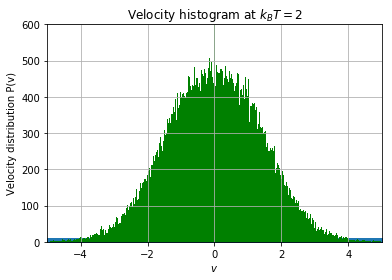

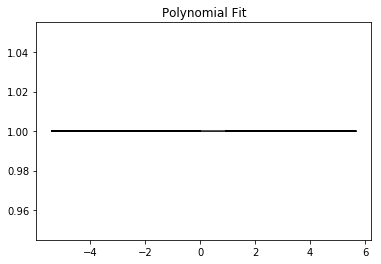

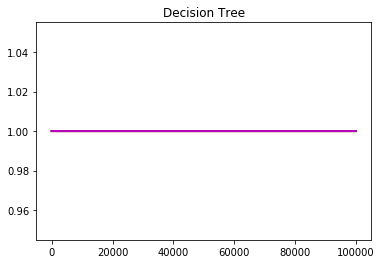

In [6]:
# Program to test the Metropolis algorithm with one particle at given temp in
# one dimension
#!/usr/bin/env python
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import random
from math import sqrt, exp, log
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# initialize the rng with a seed
random.seed()
# Hard coding of input parameters
MCcycles = 100000
Temperature = 2.0
beta = 1./Temperature
InitialVelocity = -2.0
CurrentVelocity = InitialVelocity
Energy = 0.5*InitialVelocity*InitialVelocity
VelocityRange = 10*sqrt(Temperature)
VelocityStep = 2*VelocityRange/10.
AverageEnergy = Energy
AverageEnergy2 = Energy*Energy
VelocityValues = np.zeros(MCcycles)
# The Monte Carlo sampling with Metropolis starts here
for i in range (1, MCcycles, 1):
    TrialVelocity = CurrentVelocity + (2.0*random.random() - 1.0)*VelocityStep
    EnergyChange = 0.5*(TrialVelocity*TrialVelocity -CurrentVelocity*CurrentVelocity);
    if random.random() <= exp(-beta*EnergyChange):
        CurrentVelocity = TrialVelocity
        Energy += EnergyChange
        VelocityValues[i] = CurrentVelocity
    AverageEnergy += Energy
    AverageEnergy2 += Energy*Energy
#Final averages
AverageEnergy = AverageEnergy/MCcycles
AverageEnergy2 = AverageEnergy2/MCcycles
Variance = AverageEnergy2 - AverageEnergy*AverageEnergy
print(AverageEnergy, Variance)
n, bins, patches = plt.hist(VelocityValues, 400, facecolor='green')

plt.xlabel('$v$')
plt.ylabel('Velocity distribution P(v)')
plt.title(r'Velocity histogram at $k_BT=2$')
plt.axis([-5, 5, 0, 600])
plt.grid(True)
from collections import Counter

#print (Counter(VelocityValues))

print (VelocityValues[:20])
VelocityValues=list(Counter(VelocityValues).keys())
d=list(Counter(VelocityValues).values())

VelocityValues=np.asarray(VelocityValues)[:, np.newaxis]
d=np.asarray(d)
print (VelocityValues.shape, d.shape)

plt.scatter(VelocityValues, d)
plt.show()

#2nd Degree Polynomial
poly_feat=PolynomialFeatures(degree=20, include_bias=False)
X_poly=poly_feat.fit_transform(VelocityValues)
lin_reg=LinearRegression()
poly_fit=lin_reg.fit(X_poly,d)

y_plot=poly_fit.predict(X_poly)
plt.title("Polynomial Fit")
plt.plot(VelocityValues, y_plot, color='black', label="Fit")
plt.show()

#Decision Trees

from sklearn.tree import DecisionTreeRegressor
regr_1=DecisionTreeRegressor(max_depth=2)
regr_2=DecisionTreeRegressor(max_depth=5)
regr_3=DecisionTreeRegressor(max_depth=7)
regr_1.fit(VelocityValues, d)
regr_2.fit(VelocityValues, d)
regr_3.fit(VelocityValues, d)

X_test = np.arange(0.0, MCcycles, 0.01)[:, np.newaxis]
y_1=regr_1.predict(X_test)
y_2=regr_2.predict(X_test)
y_3=regr_3.predict(X_test)

plt.title("Decision Tree")
plt.plot(X_test, y_1, color="red", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="green", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_3, color="m", label="max_depth=7", linewidth=2)
plt.show()

#Separate each frequency not in one specific velocity, but in a range of values,
#i.e. frequency of all velocities in range -5 to -4.9, -4.9 to -4.8, etc...